# Домашнее задание №2

<span style="color: red; font-size: 14pt">Дедлайн: 13 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

Составлено с использованием материалов Евгения Колмакова и Юрия Кашницкого (открытый курс машинного обучения, тема 3), а также лекций по машинному обучению Евгения Соколова

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 0. Вопросы для самоконтроля

##### Перед выполнением задания убедитесь, что вы знаете ответы на этот теор.минимум
##### Эта часть задания не оценивается, ответы можно не записывать

1. Что такое решающее дерево? Как по построенному дереву найти прогноз для объекта?
2. Почему для любой выборки можно построить дерево, имеющее нулевую ошибку на ней? Приведите примеры.
3. Почему не рекомендуется строить небинарные деревья (имеющие более двух потомков у каждой вершины)?
4. Как устроен жадный алгоритм построения дерева?
5. Какие критерии информативности для решения задачи классификации вы знаете?
6. Какой смысл у критерия Джини и энтропийного критерия?
7. Какие критерии информативности для решения задачи регрессии вы знаете?
8. Что такое pruning (стрижка) дерева? Чем отличаются post-pruning и pre-pruning?
9. Какие методы обработки пропущенных значений вы знаете?
10. Как учитывать категориальные признаки в решающем дереве?
11. Что такое mean target encoding? Почему эта техника хорошо работает для решающих деревьев?
12. Как работает отбор признаков с помощью решающих деревьев?

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 1 час

##### Решение можно затехать здесь или написать от руки и добавить фото в ноутбук

### Задача 1 (10% баллов)

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожиданию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты равновероятными)?

В данном случае у нас $L(y,c) = (y-c)^2$, где с - ответ в листе <br>
Будем рассматривать y из обучающей выборки, так как про тестовую выборку мы ничего не знаем и не можем ничего сказать. <br>
При случайном выборе ответа получим: 
$$E((y-c)^2 \;|\; c=y_i) = \sum_{y \in leaf} (y - y_i)^ 2 * \frac{P(choose \;y, answer \;is\; y_i)}{P(answer \;is \;y_i)} = \sum_{y \in leaf} (y - y_i)^ 2 \frac{1}{|leaf|^2} \frac{1}{\frac{1}{|leaf|}} = \sum_{y \in leaf} (y - y_i)^ 2 \frac{1}{|leaf|}$$ 
При выборе среднего значения таргета. 
$$E((y - c)^2\;|\;c=\overline y) = \sum_{y \in leaf} (y - \overline y)^2 * P(choose\; y) = \sum_{y \in leaf} (y - \overline y)^2 \frac{1}{|leaf|}$$ 
Как известно второе значение не больше первого: 
$$\sum_{y \in leaf} (y - \overline y)^2 \leq \sum_{y \in leaf} (y - y_i)^ 2$$
Поэтому для уменьшения матожидания ошибки по MSE в листе выгоднее выбирать среднее значение таргета.

### Задача 2 (15% баллов)

Критерий информативности для набора объектов $L$ вычисляется на основе того, насколько хорошо их целевые переменные предсказываются константой (при оптимальном выборе этой константы):
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c),$$
где $L(y_i, c)$- некоторая функция потерь. Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное значение константы и подставить его в формулу для $H(R)$.

Выведите критерии информативности для следующих функций потерь:
1. $L(y,c) = (y-c)^2$
2. $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$
3. $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

**Подсказка**:
должны получиться дисперия, критерий Джини и энтропийный критерий.

**1.** <br>
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} (y_i - c)^2$$
Для нахождения минимума продифференцируем выражение под минимумом и приравняем к 0: $$\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} -2(y_i - c) = 0$$ <br>
$$\Rightarrow \sum_{(x_i,y_i) \in R} y_i = \sum_{(x_i,y_i) \in R} c = nc$$
$$\Rightarrow c = \overline y$$
В итоге, критерий информативности получается равным
$$\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} (y_i - \overline y)^2$$
Эта величина является дисперсией ответов на данной выборке. <br>
<br>
**2.** <br>
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^K (c_k-[y=k])^2 = \min_{c \in Y} \dfrac{1}{|R|} \sum_{k=1}^K \sum_{(x_i,y_i) \in R}  (c_k -[y=k])^2$$ <br>
Заметим, что каждое $c_k$ можно выбирать независимо от других. Тогда продифференцируем отдельно по каждому $c_k$ и получим: 
$$\sum_{(x_i,y_i) \in R} 2(c_k -[y=k]) = 0$$
$$\Rightarrow |R| c_k = \sum_{(x_i,y_i) \in R} [y=k] \;\; \Rightarrow c_k = \frac{\sum_{(x_i,y_i) \in R} [y=k]}{|R|} = p_k$$ 
Полученная величинаявляется долей объектов класса k в выборке R. Подставим:
$$H(R) = \dfrac{1}{|R|} \sum_{k=1}^K \sum_{(x_i,y_i) \in R}  (p_k -[y=k])^2 = \sum_{k=1}^K ( \sum_{(x_i,y_i) \in R}  \frac{p_k^2}{|R|} - \;2 p_k \sum_{(x_i,y_i) \in R} \frac{[y=k]}{|R|} + \sum_{(x_i,y_i) \in R} \frac{[y=k]}{|R|})$$
Здесь воспользовались тем, что индикатор в квадрате есть сам индикатор. Далее заметим, что $\sum_{(x_i,y_i) \in R} \frac{[y=k]}{|R|} = p_k$
$$ H(R) = \sum_{k=1}^K ( p_k^2 - \;2 p_k p_k + p_k) = \sum_{k=1}^K p_k (1 - p_k)$$
Получили критерий Джини <br> <br>
**3.** <br>
$$H(R) = \min_{c \in Y} -\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R}\sum_{k=1}^K [y=k]\log c_k$$
Сначала вспомним, что все значения $c_k$ должны суммироваться в 1. Тогда для поиска оптимальных $c_k$ сначала найдем минимум Лагранжиана:
$$L(c_1, ..., c_k, \lambda) =  -\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R}\sum_{k=1}^K [y=k]\log c_k + \lambda \sum_{k=1}^K c_k$$
Продифференцируем: 
$$L'_{c_k}(c_1, ..., c_k, \lambda) = -\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} \frac{[y=k]}{c_k} + \lambda = p_k c_k - \lambda = 0$$
$$\Rightarrow c_k = \frac{p_k}{\lambda}$$
При этом: $$\sum_{k=1}^K c_k = \sum_{k=1}^K \frac{p_k}{\lambda} = \frac{1}{\lambda} = 1$$
$$\Rightarrow \lambda = 1 \Rightarrow c_k = p_k$$
Подставим:
$$H(R) = -\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R}\sum_{k=1}^K [y=k]\log p_k =\sum_{k=1}^K  \sum_{(x_i,y_i) \in R} \frac{[y=k]}{|R|}\log p_k = \sum_{k=1}^K p_k \log p_k$$
Получили энтропийный критерий.

### Задача 3 (5% баллов)

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $l$, числа признаков $d$, максимальной глубины дерева $D$. В качестве предикатов используются пороговые функции $[x_j>t]$. При выборе предиката в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значения этого признака на объектах, попавших в текущую вершину. Считайте сложность вычисления критерия информативноси константной.

Сначала рассмотрим определенную вершину дерева, в которую попали объекты R. Тогда нам проверить каждый признак (из d). Различных значений одного признака в выборке R - O(|R|). Тогда получим, что нам нужно проверить критерий информативности для d O(|R|) значений. В итоге сложность вычисления в одной вершине - $Cd O(|R|) = O(d|R|)$ <br>
В вершинах на одной определенной глубине находится суммарно $l$ объектов, где $l$ - кол-во объектов в изначальной выборке. Поэтому получим, что сложность вычисления в вершинах на одной глубине $\sum_R O(d|R|) = O(dl)$. <br>
Максимальная глубина дерева - D, поэтому получим, что построение такого дерева (вычисление во всех вершинах дерева) имеет сложность $O(dlD)$

## Часть 2. Визуализация решающих деревьев

##### 20% баллов за задание, оценочное время выполнения 30 минут

Для начала нужно поставить GraphViz

- На macOS:
    - sudo pip install pydotplus
    - brew install graphviz
- Linux должно работать то же самое с заменой brew на sudo apt-get
    - sudo pip install pydotplus
    - sudo apt-get install graphviz
- Windows
    - Установить GraphViz отсюда: http://www.graphviz.org/Download_windows.php
    - Добавить путь к папке bin в PATH (например, "C:\Programs\Graphviz2.38\bin")
    - pip install pydotplus

Постройте решающее дерево из sklearn на датасете Car Evaluation Dataset (https://archive.ics.uci.edu/ml/datasets/car+evaluation)

Скачаем данные и посмотрим на них

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import pandas as pd

columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class values']
df = pd.read_csv('car.csv', names = columns)
df.head(10)


buying  maint doors persons lug_boot safety class values
0  vhigh  vhigh     2       2    small    low        unacc
1  vhigh  vhigh     2       2    small    med        unacc
2  vhigh  vhigh     2       2    small   high        unacc
3  vhigh  vhigh     2       2      med    low        unacc
4  vhigh  vhigh     2       2      med    med        unacc
5  vhigh  vhigh     2       2      med   high        unacc
6  vhigh  vhigh     2       2      big    low        unacc
7  vhigh  vhigh     2       2      big    med        unacc
8  vhigh  vhigh     2       2      big   high        unacc
9  vhigh  vhigh     2       4    small    low        unacc

In [27]:
df.tail(10)

buying maint  doors persons lug_boot safety class values
1718    low   low  5more       4      big   high        vgood
1719    low   low  5more    more    small    low        unacc
1720    low   low  5more    more    small    med          acc
1721    low   low  5more    more    small   high         good
1722    low   low  5more    more      med    low        unacc
1723    low   low  5more    more      med    med         good
1724    low   low  5more    more      med   high        vgood
1725    low   low  5more    more      big    low        unacc
1726    low   low  5more    more      big    med         good
1727    low   low  5more    more      big   high        vgood

Заметим, что в признаках door и persons есть текстовые значения, но сами признаки не являются категориальными - их можно сравнивать. Поэтому логично было бы заметить в признаке doors 5more на 5, а в признаке persons more на 5. Также изменим тип столбцов, по умолчанию это строчный тип

In [35]:
df.replace(to_replace='5more', value=5, inplace=True)
df.replace(to_replace='more', value=5, inplace=True)
df.doors = df.doors.apply(pd.to_numeric)
df.persons = df.persons.apply(pd.to_numeric)
df.tail(10)

buying maint  doors  persons lug_boot safety class values
1718    low   low      5        4      big   high        vgood
1719    low   low      5        5    small    low        unacc
1720    low   low      5        5    small    med          acc
1721    low   low      5        5    small   high         good
1722    low   low      5        5      med    low        unacc
1723    low   low      5        5      med    med         good
1724    low   low      5        5      med   high        vgood
1725    low   low      5        5      big    low        unacc
1726    low   low      5        5      big    med         good
1727    low   low      5        5      big   high        vgood

Видим, что у нас есть категориальные признаки. Для работы с ними будем использовать one hot encoding, то есть для каждого категориального признака создадим несколько бинарных. Для этого сначала преобразуем текстовые признаки в числа, а уже потом применим  one hot encoding.

In [47]:
#определяем индексы категориальных признаков
indeces = np.array([0, 1, 4, 5, 6])
data = np.array(df)

int_encoder = LabelEncoder()
for ind in indeces:
    df[df.columns[ind]] = int_encoder.fit_transform(df[df.columns[ind]])

labels = np.array(df['class values'])
data = np.array(df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']])


bin_encoder = OneHotEncoder()
category_data = bin_encoder.fit_transform(data[:,[0, 1, 4, 5]]).toarray()
non_category_data = data[:, [2, 3]]

data = np.hstack((category_data, non_category_data))

Посмотрим, что получилось

In [352]:
pd.DataFrame(data).head(10)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  2.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  2.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  2.0   
5  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  2.0   
6  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  2.0   
7  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  2.0   
8  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  2.0   
9  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  2.0   

    15  
0  2.0  
1  2.0  
2  2.0  
3  2.0  
4  2.0  
5  2.0  
6  2.0  
7  2.0  
8  2.0  
9  4.0

In [371]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(data, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Визуализируйте получившееся дерево с помощью GraphViz (следующая функция может помочь):

In [376]:
import warnings
warnings.filterwarnings("ignore")

In [377]:
import IPython.display #needed to render in notebook
import pydotplus #needed to convert dot format to png
from sklearn import tree
from sklearn.externals.six import StringIO

def draw_decision_tree(clf, column_names):
    dot_data = StringIO() 
    tree.export_graphviz(clf, out_file=dot_data, feature_names=column_names) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    a = IPython.display.Image(graph.create_png())
    IPython.display.display(a)

In [378]:
column_names = [str(i) for i in range(16)]

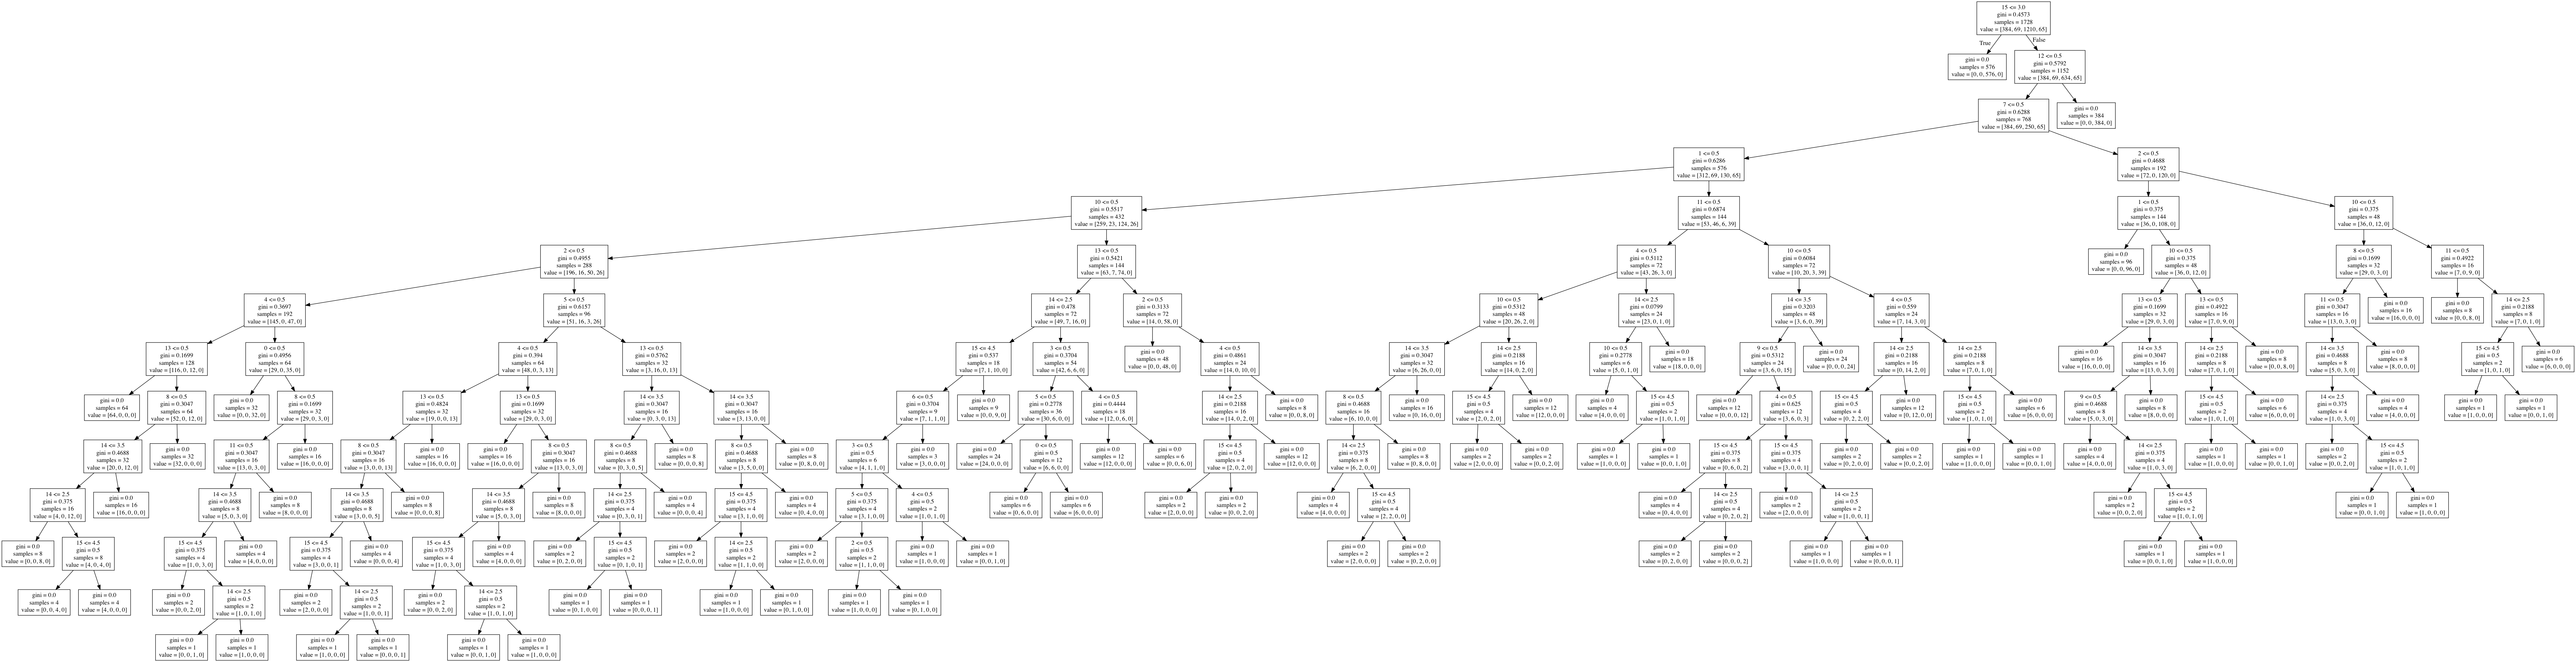

In [379]:
draw_decision_tree(tree_classifier, column_names)

Из-за большого числа признаков дерево выглядит дерево выглядит не очень наглядно, однако основная суть улавливается. Видим, что каждый лист состоит из одного-двух объектов(если увеличить картинку).

Посмотрите, как меняется картинка для различных значений структурных параметров (варьируйте параметры max_depth, criterion, min_samples_leaf, max_features). Убедитесь, что увеличение глубины дерева и уменьшение количества объектов в листьях способствует гибкости модели и, как следствие, переобучению (что соответствует интуитивным соображениям о структуре дерева).

**Варьируем параметр max_depth**

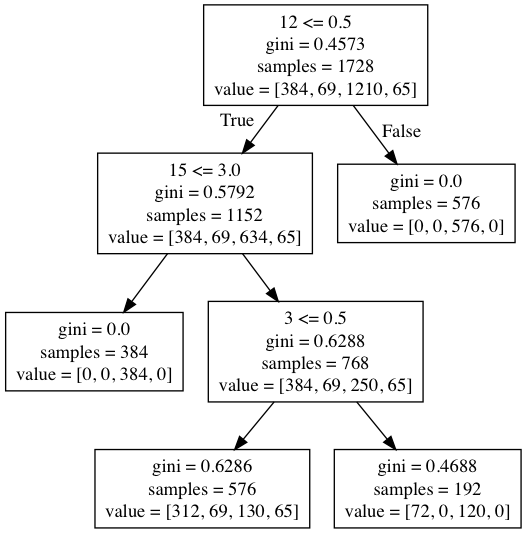

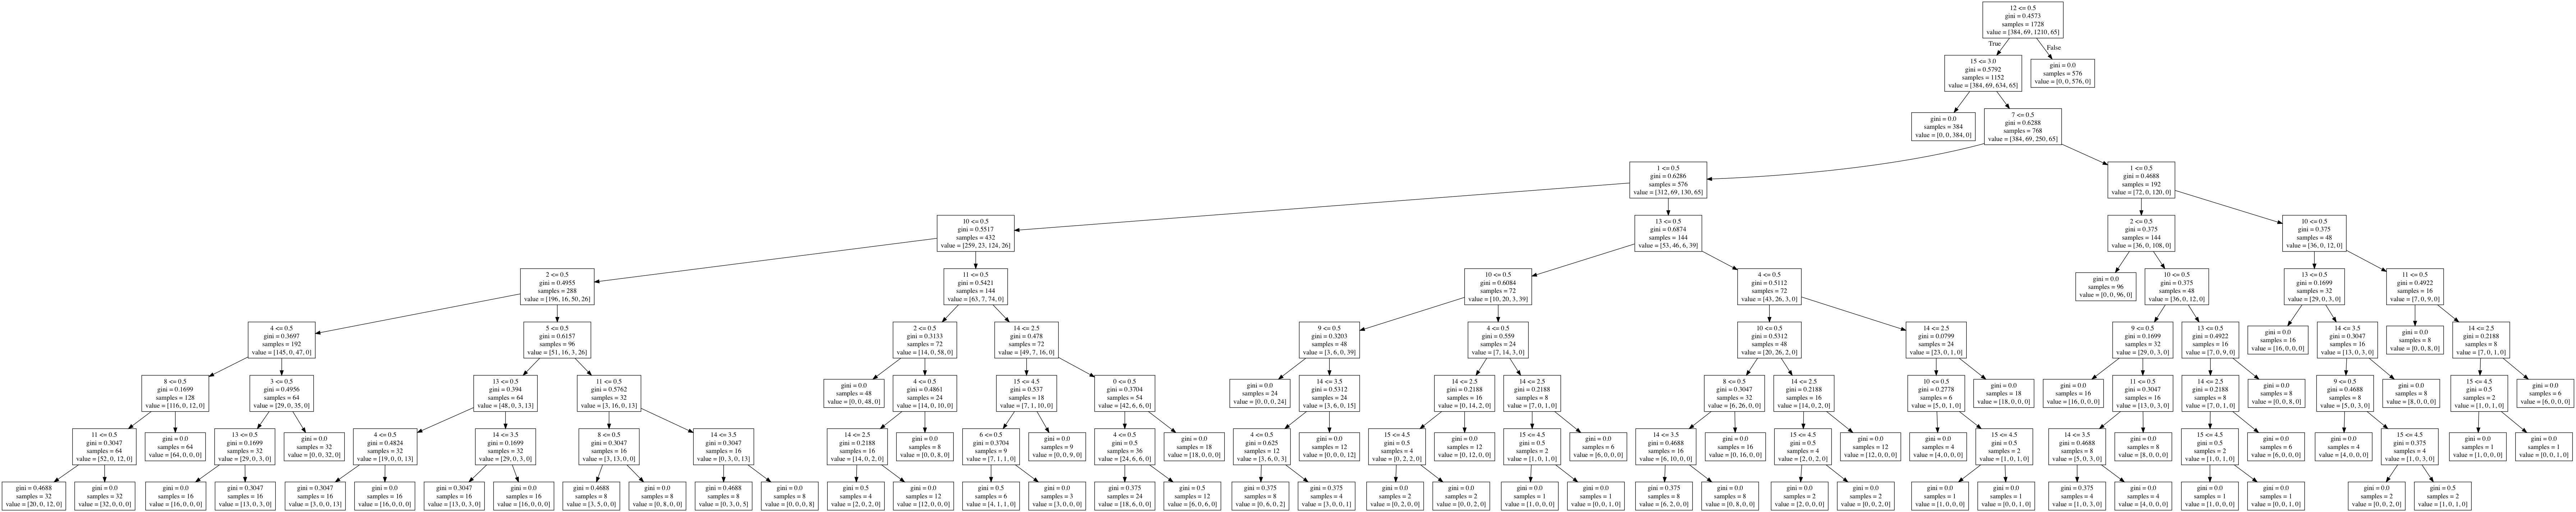

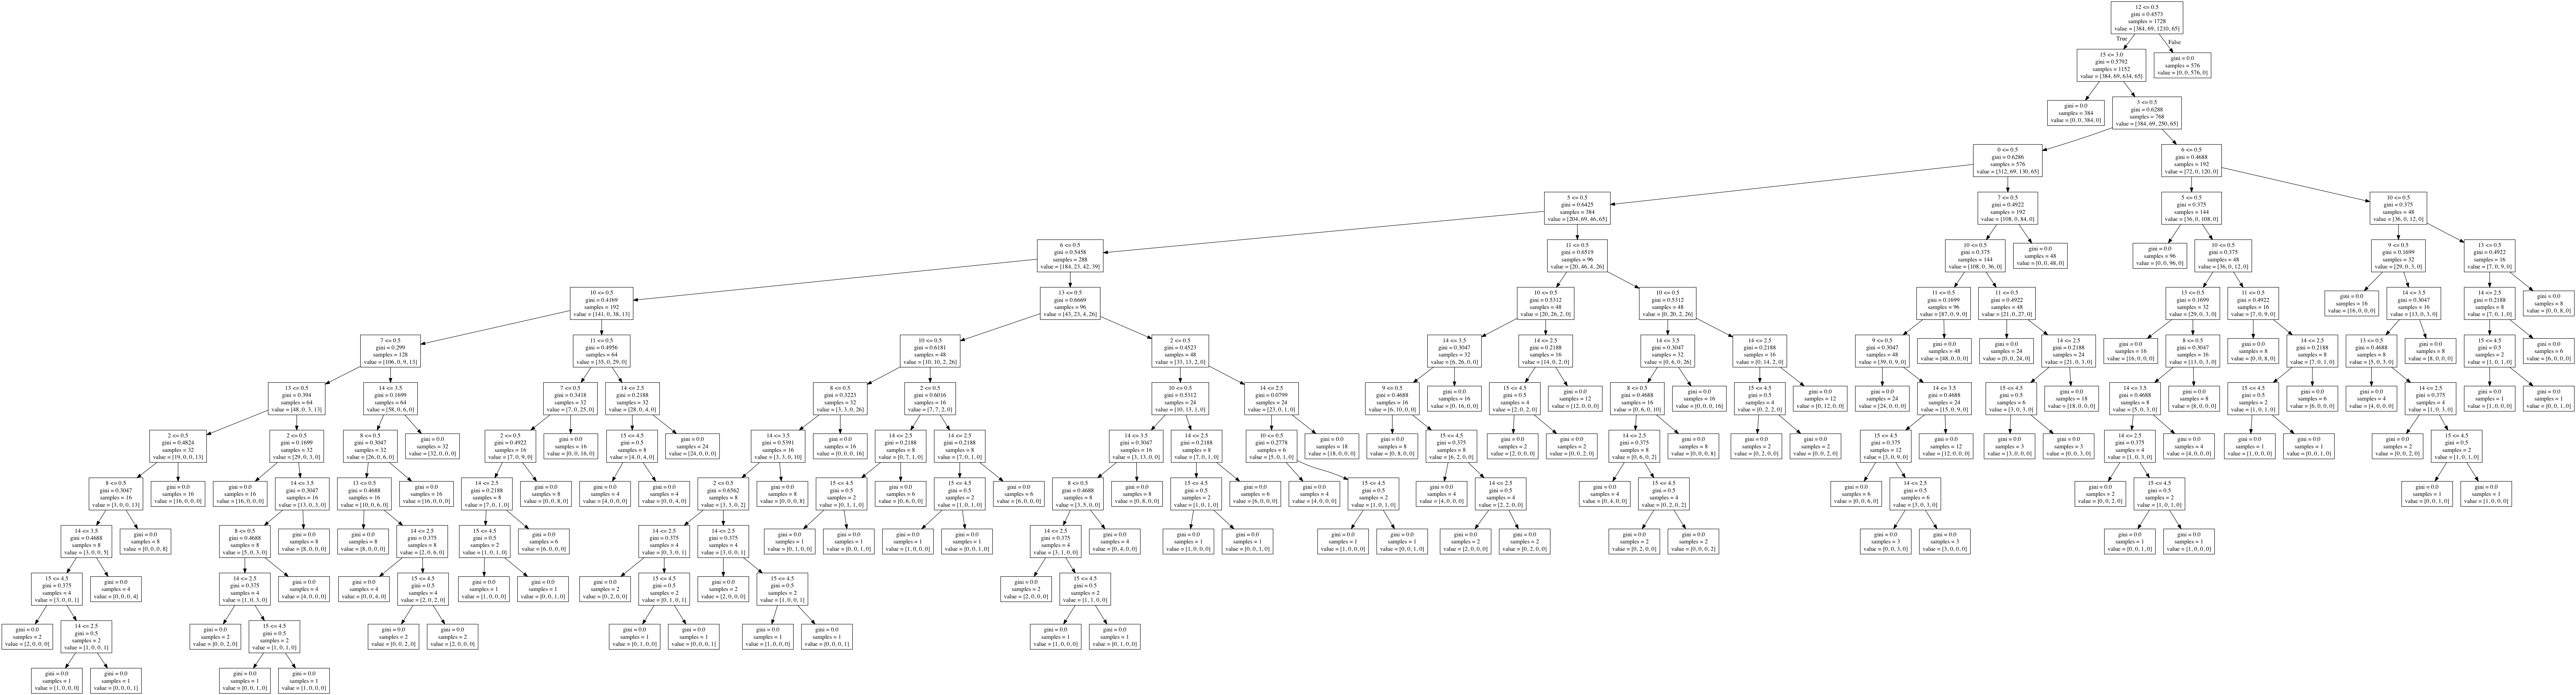

In [381]:
max_depths = np.array([3, 9, 15])
for max_depth in max_depths:
    tree_classifier = DecisionTreeClassifier(max_depth=max_depth)
    tree_classifier.fit(data, labels)
    draw_decision_tree(tree_classifier, column_names)

При маленьком значении max_depth в каждый лист попадает большое число объектов из обучающей выборки - от 192 до 578. На лицо недообучение. При средней глубине дерева в лист попадает 8-30 объектов, что кажется примерно оптимальным. А вот при большой глубине в каждом листе всего один объект, что, конечно же, является переобучением.

**Варьируем параметр criterion**

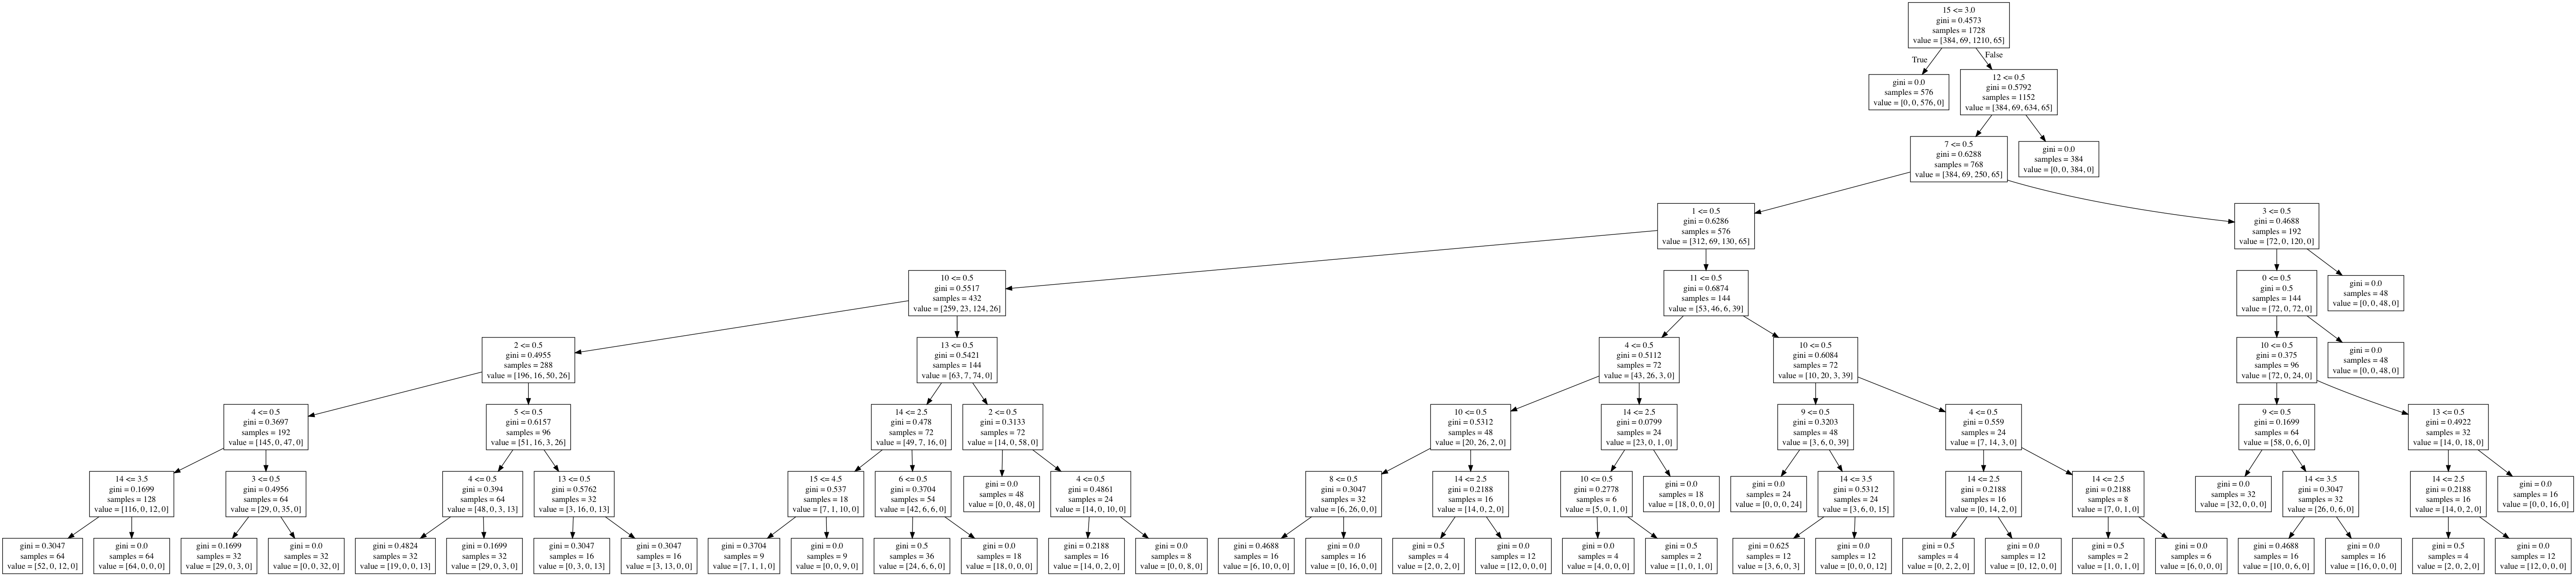

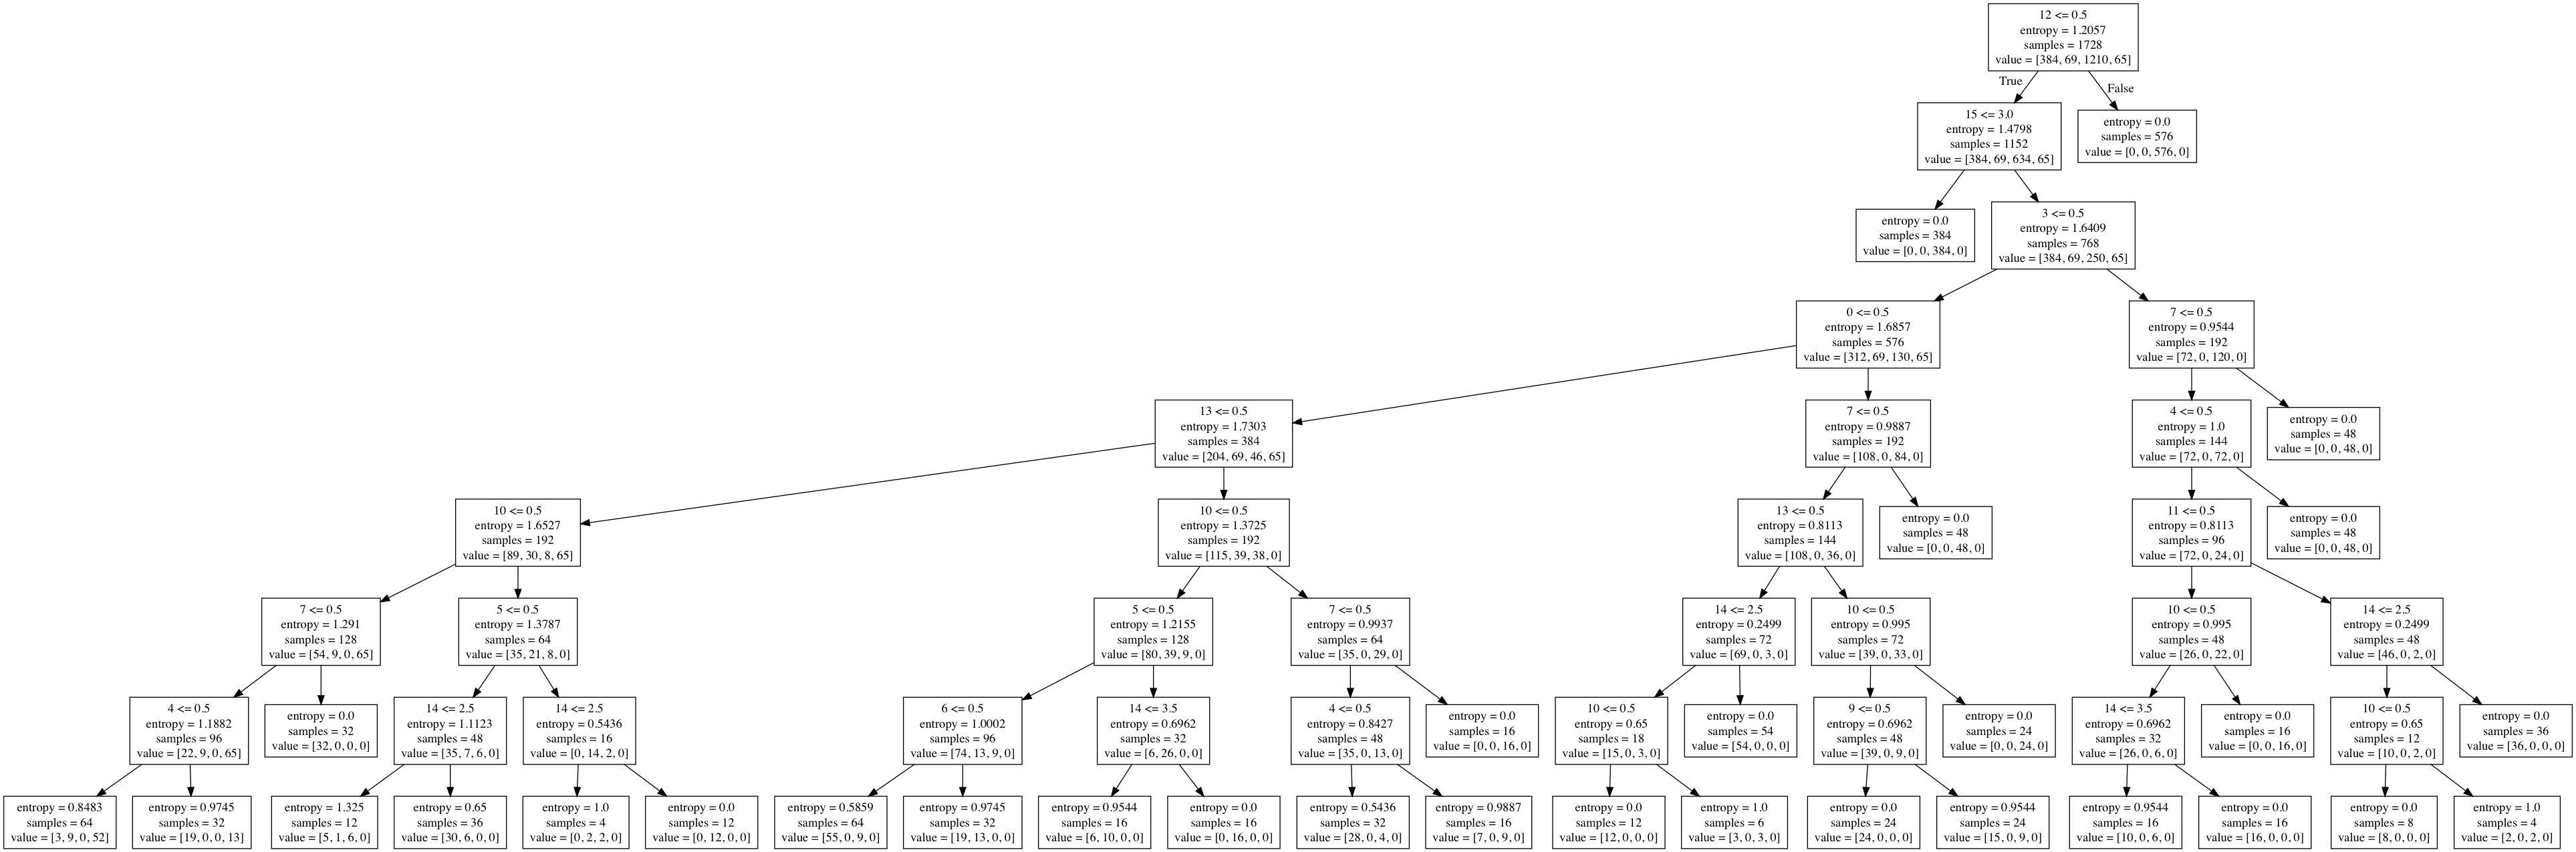

In [383]:
criterions = np.array(['gini', 'entropy'])
for criterion in criterions:
    tree_classifier = DecisionTreeClassifier(criterion=criterion, max_depth=8)
    tree_classifier.fit(data, labels)
    draw_decision_tree(tree_classifier, column_names)

Видим, что деревья получились довольно разнымы, что говорит о том, что нужно тщательно подходить к выбору критерия в зависимости от задачи и данных.

**Варьируем параметр min_samples_leaf**

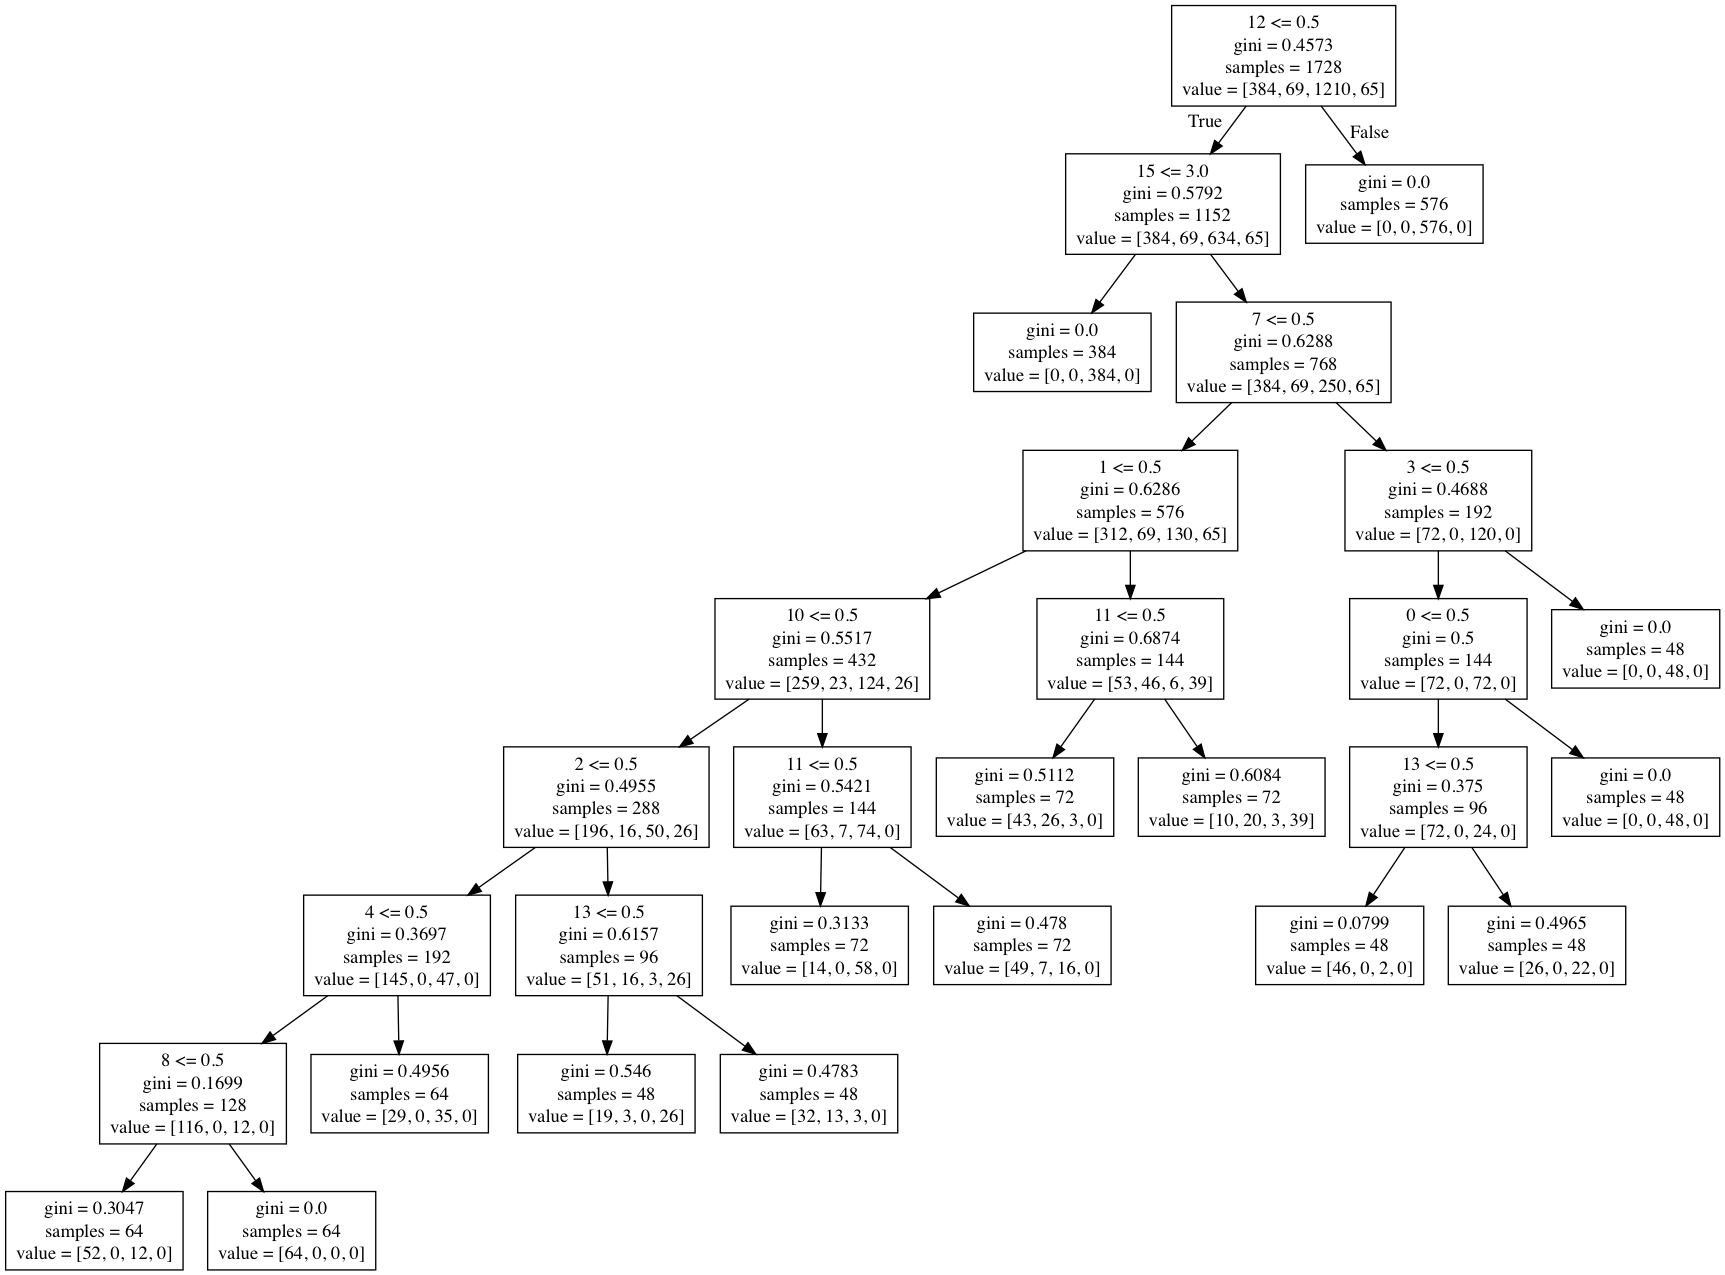

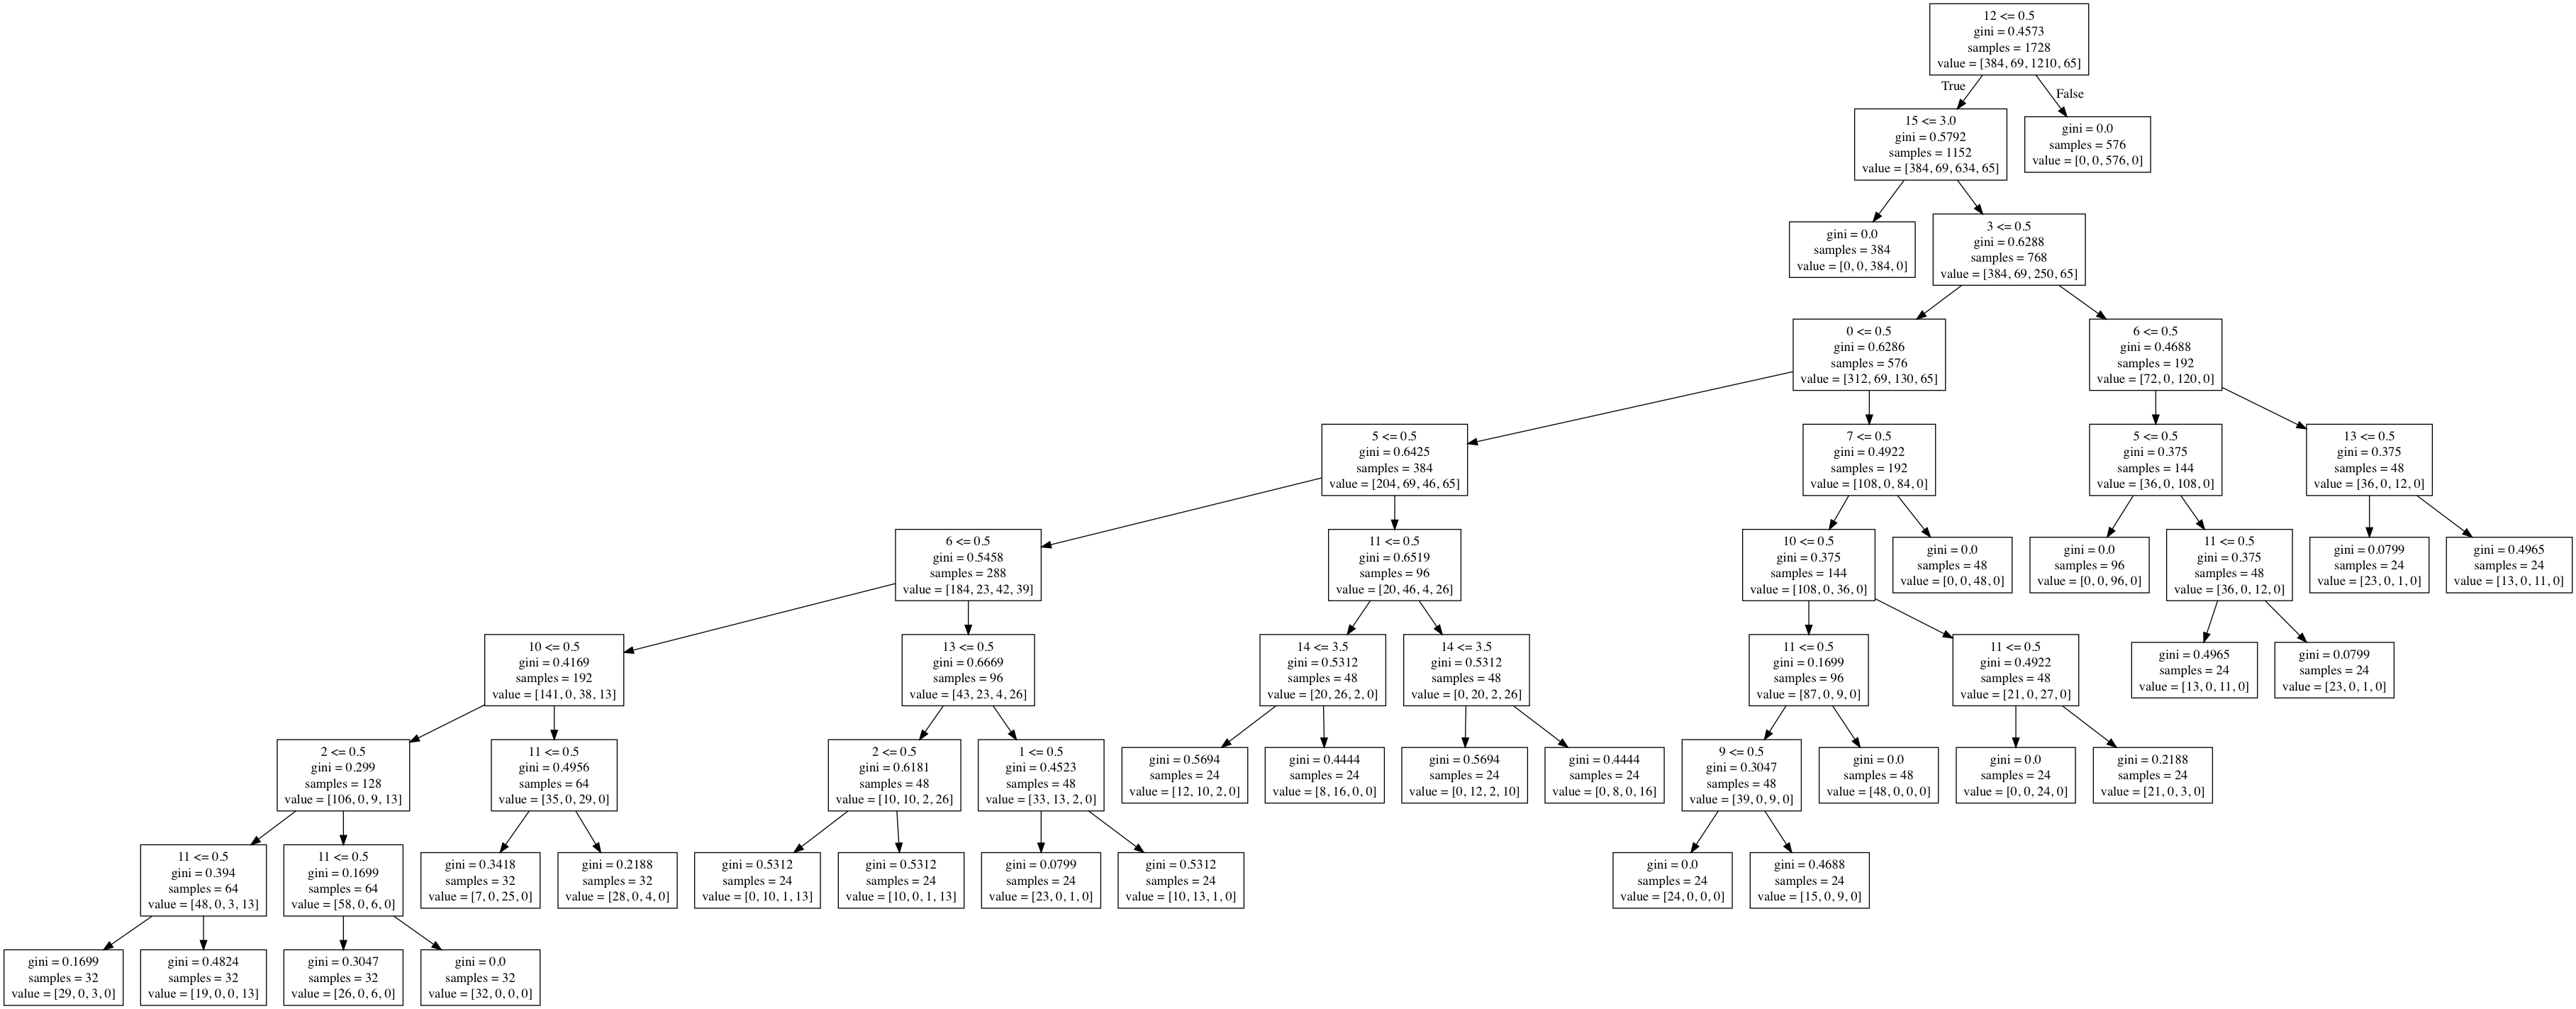

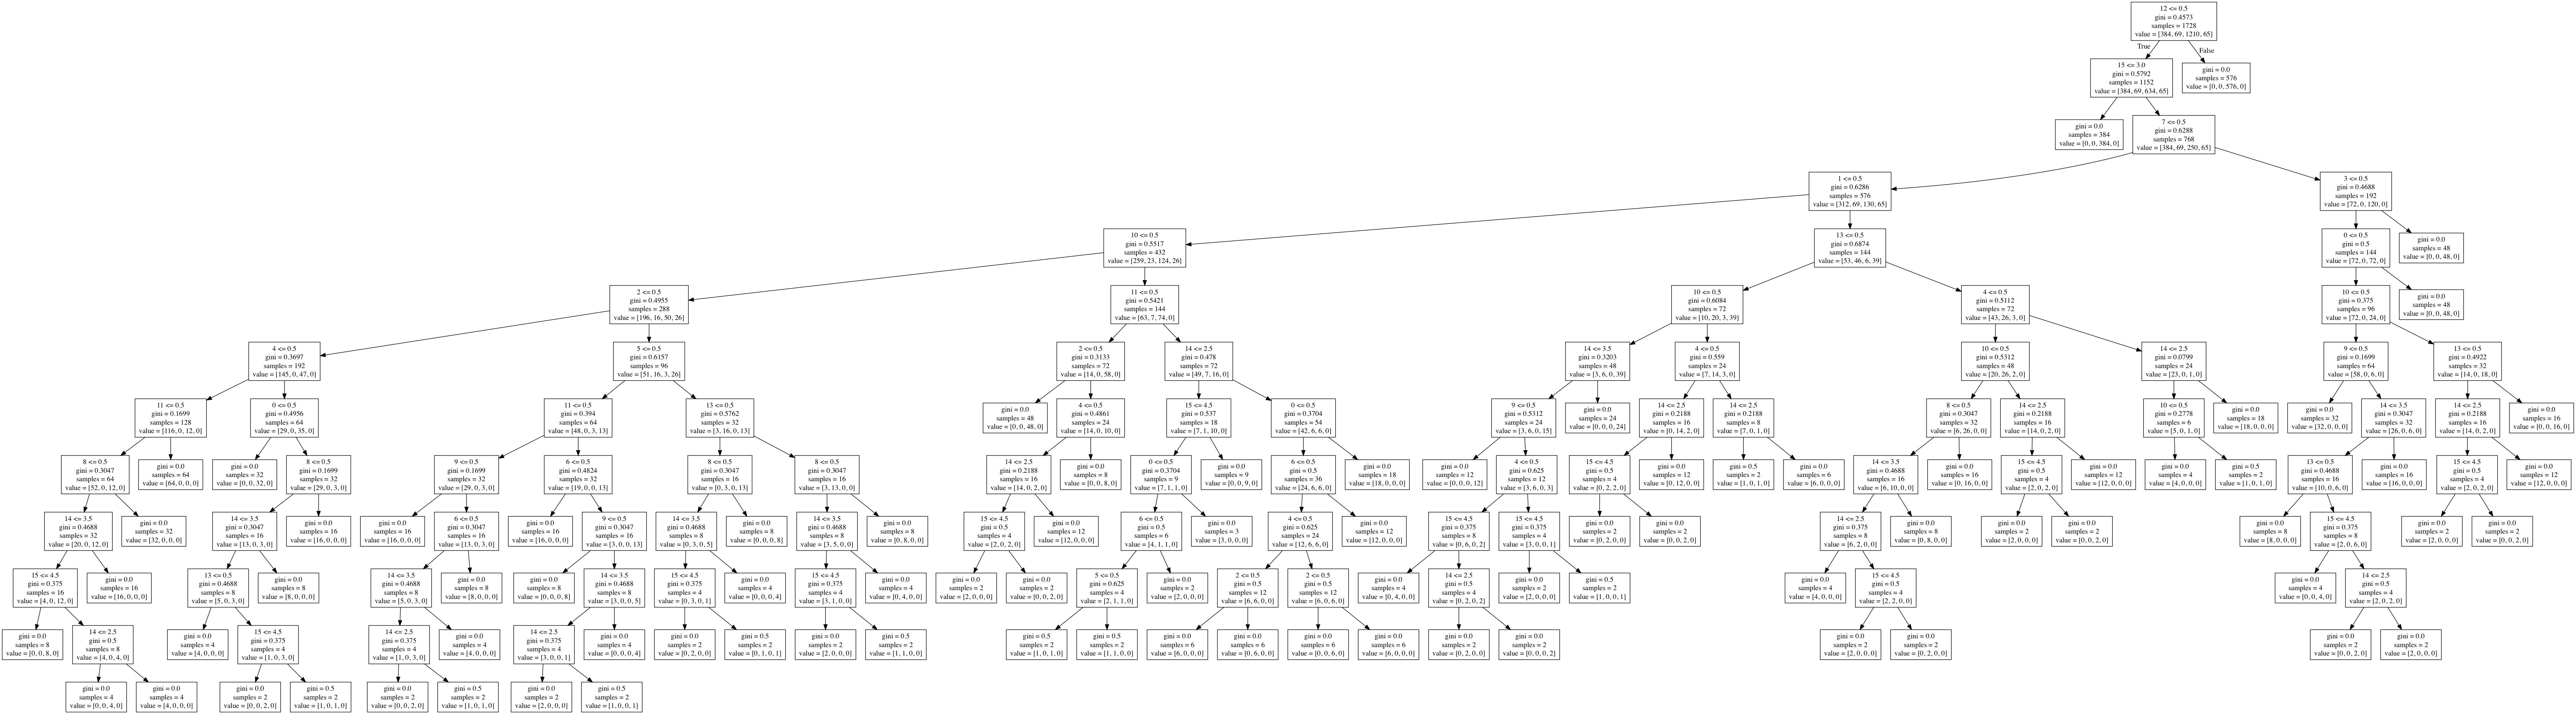

In [384]:
min_samples_leafs = np.array([40, 20, 2])
for min_samples_leaf in min_samples_leafs:
    tree_classifier = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    tree_classifier.fit(data, labels)
    draw_decision_tree(tree_classifier, column_names)

Как видим, при увеличении минимального числа обьектов в листе дерево становиться все глубже и все больше подстраивается под обучающую выборку.

**Варьируем параметр max_features**

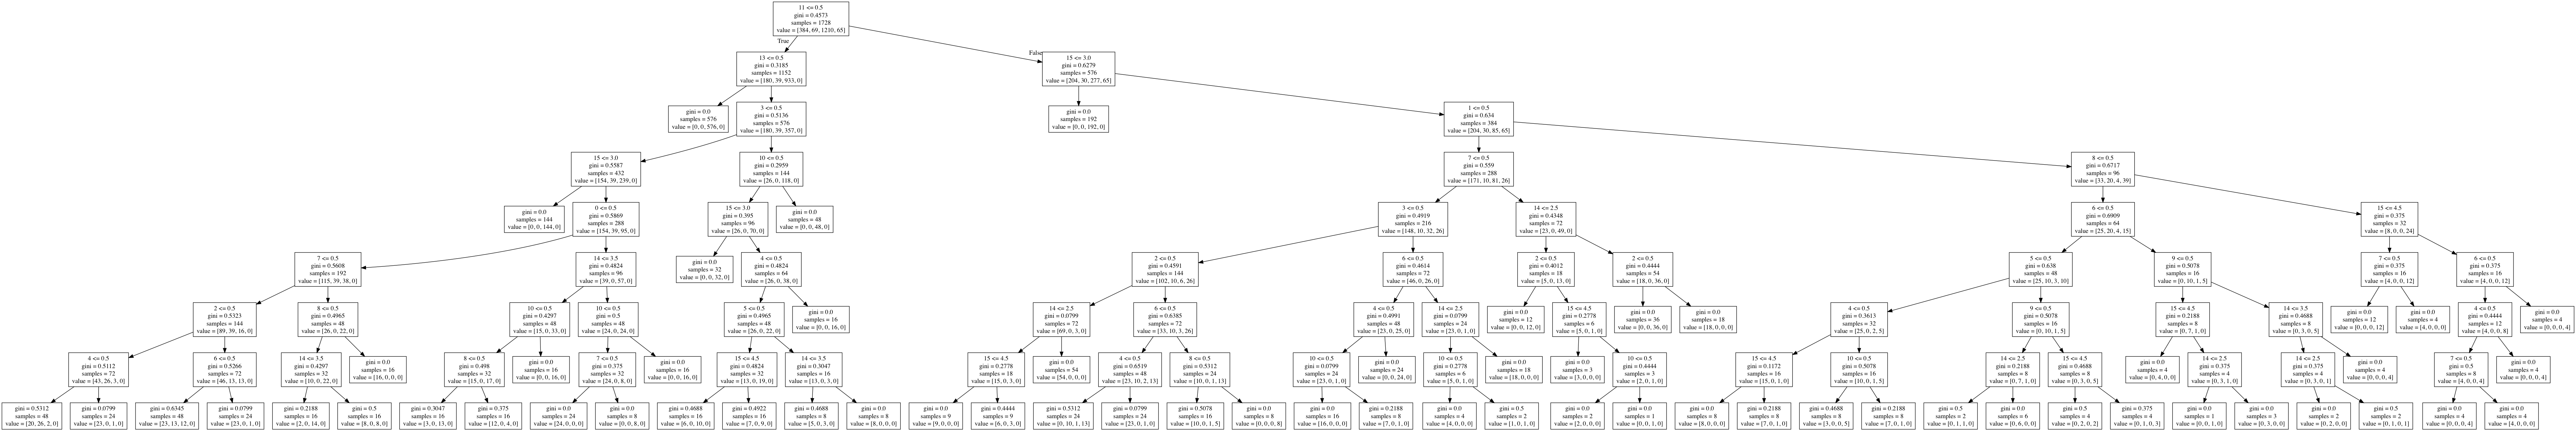

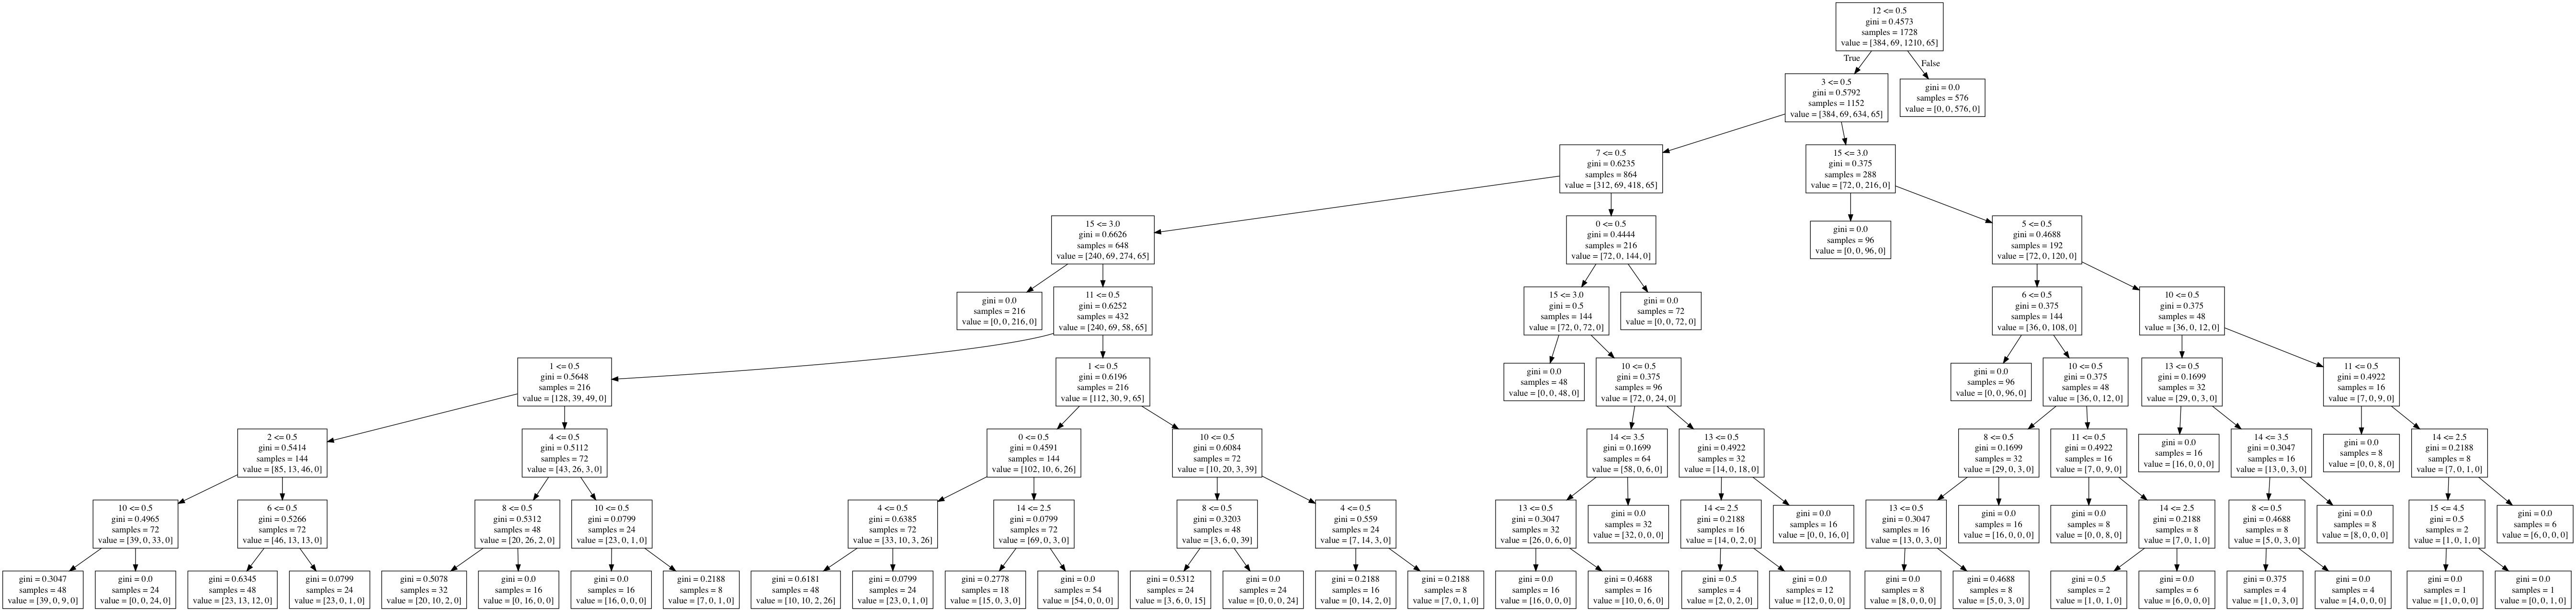

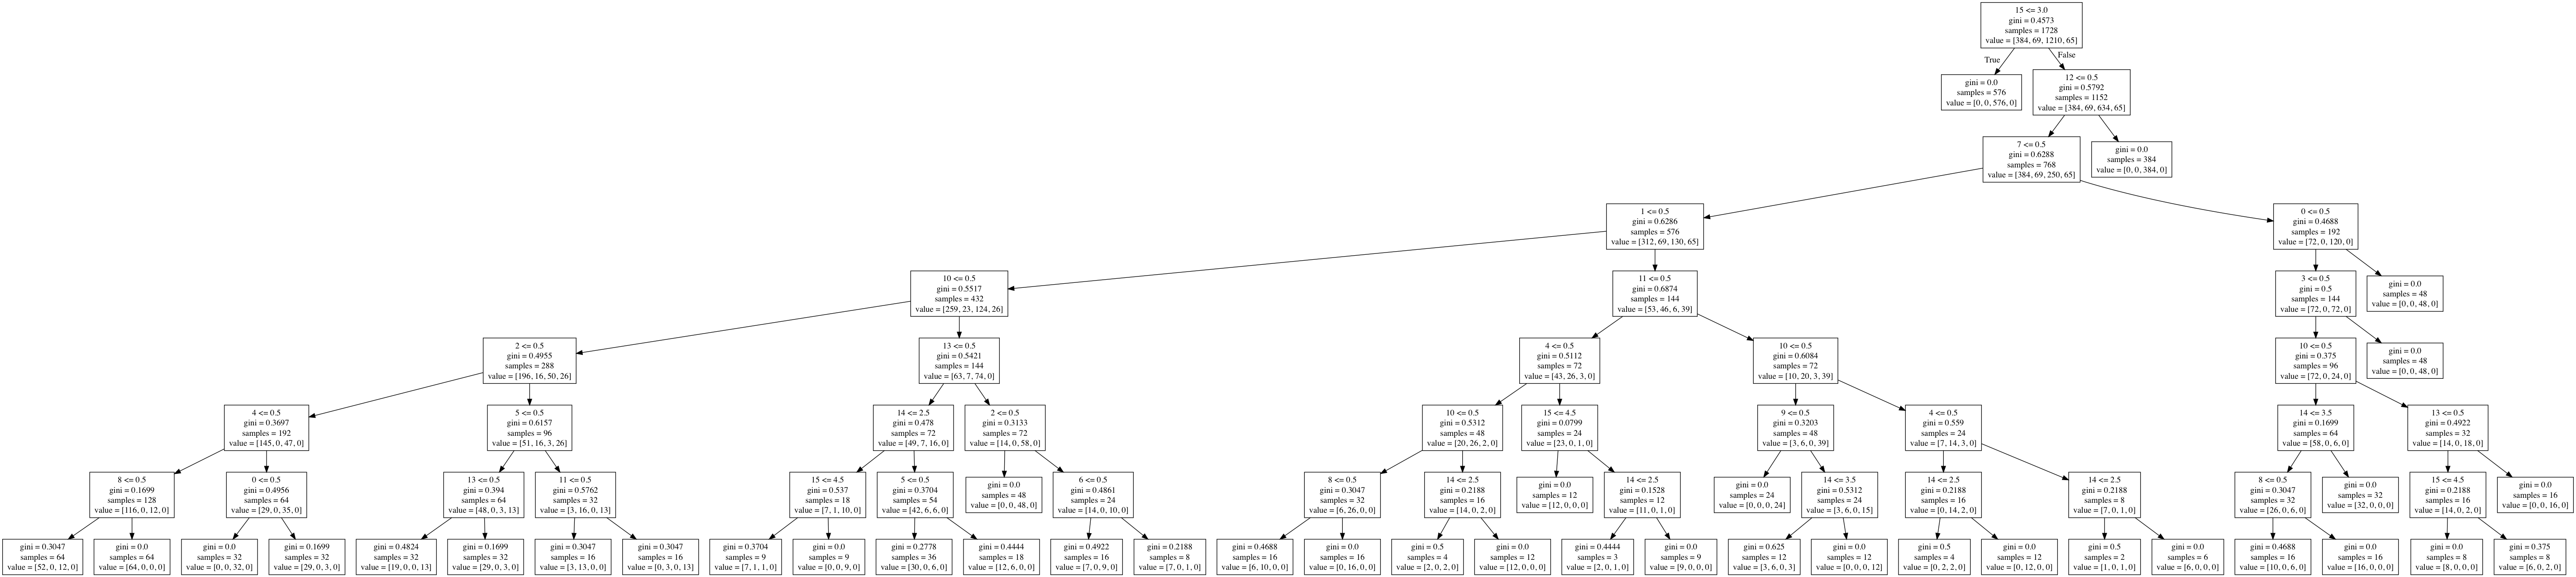

In [390]:
max_features = np.arange(7, 16, 3)
for n in max_features:
    tree_classifier = DecisionTreeClassifier(max_features=n, max_depth=8)
    tree_classifier.fit(data, labels)
    draw_decision_tree(tree_classifier, column_names)

Как видим, деревья получились довольно разными

## Часть 3. Реализация алгоритма построения дерева решений

##### 50% баллов за задание, оценочное время выполнения 2-3 часа

In [150]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

Зафиксируем заранее `random_state` (a.k.a. random seed). Это должно повысить вероятность полной воспроизводимости результатов, впрочем, замечено, что тем не менее небольшие флуктуации возможны (например, качества прогнозов дерева, которое мы сейчас вырастим) в случае разных ОС.

In [2]:
RANDOM_STATE = 42

**Необходимо реализовать класс `DecisionTree`**

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    `min_samples_split` - минимальное число объектов в вершине, при котором происходит её разбиение (по умолчанию - 2); 
    `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', для регрессии - 'variance' или 'mad_median'; 
    по умолчанию - 'gini');
    
    Функционал, значение которого максимизируется для поиска оптимального разбиения в данной вершине имеет вид
    $$Q(X, j, t) = F(X) - \dfrac{|X_l|}{|X|} F(X_l) - \dfrac{|X_r|}{|X|} F(X_r),$$
    где $X$ - выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ - разбиение выборки $X$ на две части 
    по предикату $[x_j < t]$, а $F(X)$ -критерий разбиения.
    
    1. Для классификации: пусть $p_i$ - доля объектов $i$-го класса в выборке $X$.
    
        - 'gini': Неопределенность Джини $F(X) = 1 -\sum_{i = 1}^K p_i^2$.
    
        - 'entropy': Энтропия $F(X) = -\sum_{i = 1}^K p_i \log_2(p_i)$.
    
    2. Для регрессии: $y_j = y(x_j)$ - ответ на объекте $x_j$, $y = (y_1, \dots, y_{|X|})$ - вектор ответов.
    
        - 'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$
    
        - 'mad_median': Среднее отклонение от медианы $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}|y_j - \mathrm{med}(y)|$
    
- класс имеет методы `fit`, `predict` и `predict_proba`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `DecisionTree`, представляющий собой решающее дерево, обученное по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict_proba` принимает матрицу объектов `X` и возвращает матрицу `P` размера `X.shape[0] x K`, где `K` - число классов, такую что $p_{ij}$ есть вероятность принадлежности объекта, заданного $i$-ой строкой матрицы X к классу $j \in \{1, \dots, K\}$.
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов; в случае классификации - это 
    наиболее многочисленный класс в листе, в который попал объект, а в случае регрессии - среднее значение ответов по 
    всем объектам этого листа;

**Советы по реализации:**

- Обучение дерева можно реализовать простым жадным рекурсивным алгоритмом: каждый раз выбирать наилучшее разбиение (номер признака и порог по нему).
- Если возможных порогов для разбиения будет слишком много, выбор наилучшего разбиения окажется вычислительно очень громоздкой задачей. Можно ограничить множество порогов любым удобным способом (например, посчитать квантили значений каждого признака или просто взяв случайный набор порогов).
- Лучше не подсматривать решение в готовых нагугленных вариантах. От вас требуется сделать всего лишь максимально простую реализацию того, как строится и применяется решающее дерево, а не применимую на практике универсальную библиотеку.

### Реализация (30% баллов)

In [312]:
def entropy(y):
    classes = np.unique(y)
    ps = np.zeros(len(classes))
    for i,c in enumerate(classes):
        ps[i] = len(y[y==c]) / len(y)
    return - np.sum(ps * np.log2(ps))

def gini(y):
    classes = np.unique(y)
    ps = np.zeros(len(classes))
    for i,c in enumerate(classes):
        ps[i] = len(y[y==c]) / len(y)
    return 1 - np.sum(ps**2)

def variance(y):
    return np.mean((y - np.mean(y))**2)

def mad_median(y):
    return np.mean(np.abs(y - np.median(y)))

Замечания к реализации: <br>
1) Заметим, что если мы находимся в вершине с индексом i от корня (нумерация с нуля), то левый потомок будет иметь индекс 2i+1, а правый 2i+2. Будем хранить массив из выбранных признаков по каждому разбиению и массив выбранных значений для каждого разбиения. <br>
2) Заметим, что если мы находимся в вершине с номером i, то глубина этой вершины от корня - $log_2(i+1)$ (нумерация вершин с нуля от корня) <br>
3) Также заметим, что если максимальная глубина дерева не задана, то есть max_depth = np.inf, то максимально возможная глубина дерева не должна превышать $\frac{n}{min\_samples\_split}$. <br>

In [313]:
class DecisionTree(BaseEstimator):
    
    def __init__(self, max_depth=np.inf, min_samples_split=2, 
                 criterion='gini', debug=False):
        self.max_depth = min(max_depth, 20)
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        #для каждой вершины будем хранить признак и значения, по которым разбиваем в этой вершине 
        self.attributes = np.full(2**self.max_depth - 1, None)
        self.values = np.full(2**self.max_depth - 1, None)
        #для каждой вершины храним набор объектов из тренировочной выборки, которые в нее попали
        self.train_sets = np.full(2**self.max_depth - 1, None)
        
            
    def evaluate_criterion(self, y):
        if self.criterion == 'entropy':
            return entropy(y)
        if self.criterion == 'gini':
            return gini(y)
        if self.criterion == 'variance':
            return variance(y)
        if self.criterion == 'mad_median':
            return mad_median(y)
            
    def spliting(self, X, y, attribute, value):
        X_l = X[X[:,attribute] >= value]
        y_l = y[X[:,attribute] >= value]
        X_r = X[X[:,attribute] < value]
        y_r = y[X[:,attribute] < value]
        return X_r, X_l, y_r, y_l
    
    def best_splitting(self, X, y):
        best_Q = 0.
        best_attribute, best_value = None, None
        best_set1, best_set2 = None, None
        current_F = self.evaluate_criterion(y)
        
        for attribute in range(X.shape[1]):
            attribute_values = np.unique(X[:,attribute])
            for value in attribute_values:
                X_r, X_l, y_r, y_l = self.spliting(X, y, attribute, round(value, 4))
                Q = current_F - (X_l.shape[0]/X.shape[0])*self.evaluate_criterion(y_l) -(X_r.shape[0]/X.shape[0])*self.evaluate_criterion(y_r)
                
                if Q > best_Q and len(y_l) > 0 and len(y_r) > 0:
                    best_Q = Q
                    best_attribute = attribute
                    best_value = round(value, 4)
                    best_set1 = (X_l, y_l)
                    best_set2 = (X_r, y_r)
        return best_attribute, best_value, best_set1, best_set2

    def build(self, X, y, node):
        #проверяем условия остановки
        if len(y) <= self.min_samples_split:
            self.train_sets[node] = y
            return
        elif len(np.unique(y)) == 1:
            self.train_sets[node] = y
            return
        elif self.max_depth <= np.log2(node+1) + 1:
            self.train_sets[node] = y
            return
        else:
            best_attribute, best_value, best_set1, best_set2 = self.best_splitting(X, y)
            self.attributes[node] = best_attribute
            self.values[node] = best_value
            self.train_sets[node] = y
            
            self.build(best_set1[0], best_set1[1], 2*node +1)
            self.build(best_set2[0], best_set2[1], 2*node +2)
        
    
    def fit(self, X, y):
        if self.criterion == 'gini' or self.criterion == 'entropy':
            self.classes = np.unique(y)
        self.build(X, y, 0)
        return self

    
    def descent(self, X, indeces, node, proba=False):
        '''indeces - номера объектов из тестовой выборки, попавшие в вершину с номером node
        (индексы объектов X из исходной тестовой выборки)'''
        #если дальше некуда идти
        if self.attributes[node] == None:
            #если классификация
            if proba:
                unique_classes, count_classes = np.unique(self.train_sets[node], return_counts=True)
                pred_proba = np.zeros(len(self.classes))
                for i,c in enumerate(unique_classes):
                    pred_proba[np.where(self.classes == c)] = count_classes[i] / self.train_sets[node].shape[0]
                for ind in indeces:
                    self.proba[ind] = pred_proba
                return
                
            elif self.criterion == 'gini' or self.criterion == 'entropy':
                unique_classes, count_classes = np.unique(self.train_sets[node], return_counts=True)
                self.prediction[indeces] = unique_classes[np.argmax(count_classes)]
                return
            #регрессия
            else:
                self.prediction[indeces] = np.mean(self.train_sets[node])
                return
        else:
            X_r = X[X[:,self.attributes[node]] < self.values[node]]
            indeces_r = indeces[np.where(X[:,self.attributes[node]] < self.values[node])]
            X_l = X[X[:,self.attributes[node]] >= self.values[node]]
            indeces_l = indeces[np.where(X[:,self.attributes[node]] >= self.values[node])]
            self.descent(X_l, indeces_l, 2*node + 1, proba=proba)
            self.descent(X_r, indeces_r, 2*node + 2, proba=proba)
                
                
        
    def predict(self, X):
        self.prediction = np.zeros(X.shape[0])
        indeces = np.arange(X.shape[0])
        self.descent(X, indeces, 0)
        return self.prediction
    
        
        
    def predict_proba(self, X):
        self.proba = np.zeros((X.shape[0], len(self.classes)))
        self.prediction = np.zeros(X.shape[0])
        indeces = np.arange(X.shape[0])
        self.descent(X, indeces, 0, proba=True)
        
        return self.proba

## Тестирование реализованного алгоритма

### Классификация (10% баллов)

**С помощью метода `load_digits` загрузите датасет `digits`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие решающие деревья и убедитесь, что критерии gini и entropy дают разные результаты.**

In [153]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
digits = load_digits()
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

Для критерия gini

In [235]:
clf = DecisionTree(max_depth=10)
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
print(accuracy_score(prediction, Y_test))

0.8537037037037037


Для критерия entropy

In [236]:
clf = DecisionTree(criterion='entropy',max_depth=10)
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
print(accuracy_score(prediction, Y_test))

0.8685185185185185


**С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - range(3, 11), а для criterion - {'gini', 'entropy'}. Критерий качества `scoring`='accuracy'.**

In [238]:
from sklearn.grid_search import GridSearchCV

In [270]:
param_grid = {'max_depth': np.arange(3, 11), 'criterion': ['gini', 'entropy']}
cv = 5
estimator = DecisionTree()
optimizer = GridSearchCV(estimator, param_grid, cv=cv, scoring='accuracy').fit(X_train, Y_train)

Посмотрим, какие параметры получились

In [255]:
optimizer.best_params_

{'criterion': 'entropy', 'max_depth': 10}

Посмотрим на качество на тестовой выборке

In [256]:
accuracy_score(optimizer.predict(X_test), Y_test)

0.8685185185185185

**Постройте графики средних значений критерия качества `accuracy` для критериев `gini` и `entropy` в зависимости от `max_depth`.**

Посмотрим на score в зависмости от параметров

In [275]:
optimizer.grid_scores_

[mean: 0.32856, std: 0.03463, params: {'criterion': 'gini', 'max_depth': 3},
 mean: 0.44710, std: 0.02689, params: {'criterion': 'gini', 'max_depth': 4},
 mean: 0.57438, std: 0.04498, params: {'criterion': 'gini', 'max_depth': 5},
 mean: 0.67383, std: 0.03045, params: {'criterion': 'gini', 'max_depth': 6},
 mean: 0.76293, std: 0.01804, params: {'criterion': 'gini', 'max_depth': 7},
 mean: 0.79634, std: 0.01226, params: {'criterion': 'gini', 'max_depth': 8},
 mean: 0.80907, std: 0.01921, params: {'criterion': 'gini', 'max_depth': 9},
 mean: 0.80430, std: 0.01444, params: {'criterion': 'gini', 'max_depth': 10},
 mean: 0.34924, std: 0.02533, params: {'criterion': 'entropy', 'max_depth': 3},
 mean: 0.51790, std: 0.04771, params: {'criterion': 'entropy', 'max_depth': 4},
 mean: 0.64121, std: 0.05128, params: {'criterion': 'entropy', 'max_depth': 5},
 mean: 0.73906, std: 0.05377, params: {'criterion': 'entropy', 'max_depth': 6},
 mean: 0.80430, std: 0.03134, params: {'criterion': 'entropy', 

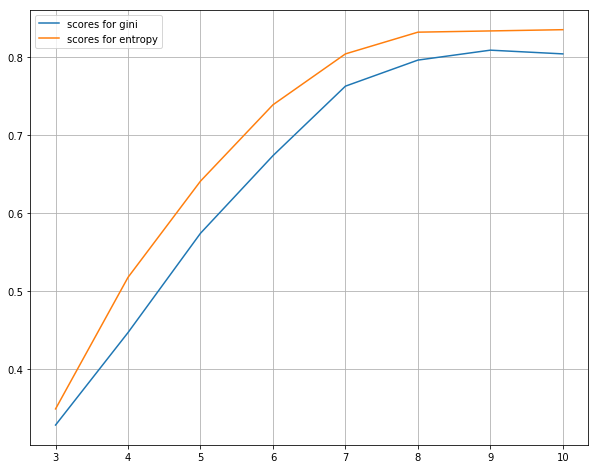

In [277]:
max_depths = np.arange(3, 11)
gini_scores = np.array([0.32856, 0.44710, 0.57438, 0.67383, 0.76293,  0.79634, 0.80907, 0.80430])
entropy_scores = np.array([0.34924, 0.51790, 0.64121, 0.73906, 0.80430, 0.83214, 0.83373, 0.83532])
plt.figure(figsize=(10, 8))
plt.plot(max_depths, gini_scores, label='scores for gini')
plt.plot(max_depths, entropy_scores, label='scores for entropy')
plt.grid()
plt.legend()
plt.show()

**Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?**

Как видим из графика лучшими параметрами являются entropy и max_depth = 10. Что соответствует полученным ранее значениям.

In [278]:
optimizer.best_params_

{'criterion': 'entropy', 'max_depth': 10}

**Используя найденные оптимальные значения max_depth и criterion, обучите решающее дерево на X_train, y_train и вычислите вероятности принадлежности к классам для X_test.**

In [295]:
clf = DecisionTree(criterion='entropy',max_depth=10)
clf.fit(X_train, Y_train)
prediction_proba = clf.predict_proba(X_test)

**Для полученной матрицы вычислите усредненные по всем объектам из `X_test` значения вероятностей принадлежности к классам.**

In [298]:
means = np.mean(prediction_proba, axis=0)
means

array([0.10648, 0.08179, 0.09074, 0.11296, 0.10463, 0.09926, 0.10093,
       0.11111, 0.08302, 0.10907])

**Чему примерно равна максимальная вероятность в полученном векторе?**

In [299]:
np.max(means)

0.11296296296296296

### Регрессия (10% баллов)

**С помощью метода `load_boston` загрузите датасет `boston`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие регрессионные деревья и убедитесь, что критерии `variance` и `mad_median` дают разные результаты.**

In [304]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
boston = load_boston()
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

Для критерия variance

In [318]:
clf = DecisionTree(criterion='variance', max_depth=6)
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
print(mean_squared_error(prediction, Y_test))

8.359997591068291


Для критерия mad_median

In [319]:
clf = DecisionTree(criterion='mad_median',max_depth=10)
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
print(mean_squared_error(prediction, Y_test))

9.336784739414691


**С помощью 5-кратной кросс-валидации подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - `range(2, 9)`, а для `criterion` - {'variance', 'mad_median'}. Критерий качества `scoring`='neg_mean_squared_error'.**

In [320]:
param_grid = {'max_depth': np.arange(2, 9), 'criterion': ['variance', 'mad_median']}
cv = 5
estimator = DecisionTree()
optimizer = GridSearchCV(estimator, param_grid, cv=cv, scoring='neg_mean_squared_error').fit(X_train, Y_train)

**Постройте графики средних значений критерия качества `neg_mean_squared_error` для критериев `variance` и `mad_median` в зависимости от `max_depth`.**

In [321]:
optimizer.grid_scores_

[mean: -48.85882, std: 8.46967, params: {'criterion': 'variance', 'max_depth': 2},
 mean: -28.32877, std: 4.64619, params: {'criterion': 'variance', 'max_depth': 3},
 mean: -36.51208, std: 7.55447, params: {'criterion': 'variance', 'max_depth': 4},
 mean: -33.19286, std: 9.28839, params: {'criterion': 'variance', 'max_depth': 5},
 mean: -33.21833, std: 9.13144, params: {'criterion': 'variance', 'max_depth': 6},
 mean: -32.59211, std: 8.13255, params: {'criterion': 'variance', 'max_depth': 7},
 mean: -31.85929, std: 7.45278, params: {'criterion': 'variance', 'max_depth': 8},
 mean: -51.65501, std: 10.56477, params: {'criterion': 'mad_median', 'max_depth': 2},
 mean: -31.48577, std: 6.57289, params: {'criterion': 'mad_median', 'max_depth': 3},
 mean: -32.97501, std: 7.85593, params: {'criterion': 'mad_median', 'max_depth': 4},
 mean: -28.89793, std: 4.01641, params: {'criterion': 'mad_median', 'max_depth': 5},
 mean: -28.58608, std: 4.81376, params: {'criterion': 'mad_median', 'max_depth

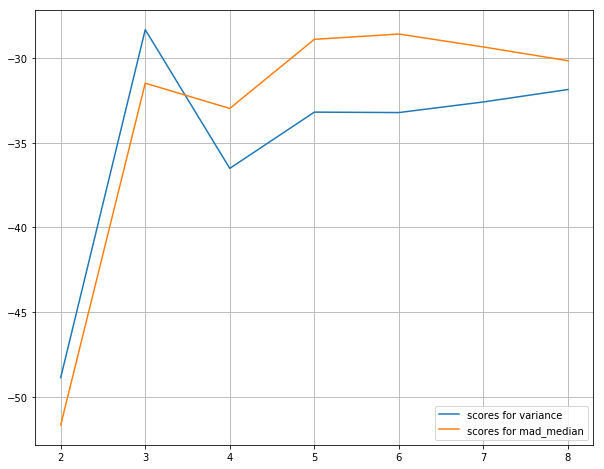

In [322]:
max_depths = np.arange(2, 9)
variance_scores = np.array([-48.85882,-28.32877, -36.51208, -33.19286, -33.21833, -32.59211, -31.85929])
mad_median_scores = np.array([-51.65501,-31.48577, -32.97501, -28.89793, -28.58608,-29.34774, -30.16101])
plt.figure(figsize=(10, 8))
plt.plot(max_depths, variance_scores, label='scores for variance')
plt.plot(max_depths, mad_median_scores, label='scores for mad_median')
plt.grid()
plt.legend()
plt.show()

**Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?**

Как видим из графиков наилучшее качество достигается при выборе параметров variance и max_depth = 3. Проверим, так ли это?

In [323]:
optimizer.best_params_

{'criterion': 'variance', 'max_depth': 3}